In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("../data/flights.txt", sep="|", header=0)
df.head()

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,AIRLINENAME,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,...,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE
0,54548800,20020101,WN,Southwest Airlines Co.: WN,N103@@,1425,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0,F,False,580 miles
1,55872300,20020101,CO,Continental Air Lines Inc.: CO,N83872,150,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1419.0,16.0,1426,1435.0,9.0,116.0,119.0,False,F,744 miles
2,54388800,20020101,WN,Southwest Airlines Co.: WN,N334@@,249,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1618.0,2.0,1500,1620.0,80.0,105.0,102.0,F,False,718 miles
3,54486500,20020101,WN,Southwest Airlines Co.: WN,N699@@,902,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0,0,0,487 miles
4,55878700,20020103,CO,Continental Air Lines Inc.: CO,N58606,234,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0,F,False,744 miles


In [3]:
def clean_date(x):
    x = str(x)
    return x[:4] + "-" + x[4:6] + "-" + x[6:]

def clean_distance(x):
    return int(x.split(" ")[0])

def clean_boolean(x: str):
    x = x.upper()
    if x.startswith("F"):
        return 0
    if x.startswith("T"):
        return 1
    return int(x)

In [4]:
df["FLIGHTDATE"] = df["FLIGHTDATE"].apply(clean_date)
df["FLIGHTDATE"] = pd.to_datetime(df["FLIGHTDATE"])

In [5]:
filtro = (df["FLIGHTDATE"] >= "2000-01-01") & (df["FLIGHTDATE"] <= "2002-12-31")
df = df.loc[filtro]

In [6]:
df["DISTANCE"] = df["DISTANCE"].apply(clean_distance)
df["CANCELLED"] = df["CANCELLED"].apply(clean_boolean)
df["DIVERTED"] = df["DIVERTED"].apply(clean_boolean)
df.head()

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,AIRLINENAME,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,...,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE
0,54548800,2002-01-01,WN,Southwest Airlines Co.: WN,N103@@,1425,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0,0,0,580
1,55872300,2002-01-01,CO,Continental Air Lines Inc.: CO,N83872,150,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1419.0,16.0,1426,1435.0,9.0,116.0,119.0,0,0,744
2,54388800,2002-01-01,WN,Southwest Airlines Co.: WN,N334@@,249,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1618.0,2.0,1500,1620.0,80.0,105.0,102.0,0,0,718
3,54486500,2002-01-01,WN,Southwest Airlines Co.: WN,N699@@,902,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0,0,0,487
4,55878700,2002-01-03,CO,Continental Air Lines Inc.: CO,N58606,234,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,...,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0,0,0,744


In [7]:
df.isnull().sum()

TRANSACTIONID           0
FLIGHTDATE              0
AIRLINECODE             0
AIRLINENAME             0
TAILNUM               234
FLIGHTNUM               0
ORIGINAIRPORTCODE       0
ORIGAIRPORTNAME         0
ORIGINCITYNAME          0
ORIGINSTATE          1504
ORIGINSTATENAME      1504
DESTAIRPORTCODE         0
DESTAIRPORTNAME         0
DESTCITYNAME            0
DESTSTATE            1528
DESTSTATENAME        1528
CRSDEPTIME              0
DEPTIME              7851
DEPDELAY             7851
TAXIOUT              7851
WHEELSOFF            7864
WHEELSON             8211
TAXIIN               8188
CRSARRTIME              0
ARRTIME              8188
ARRDELAY             8188
CRSELAPSEDTIME          6
ACTUALELAPSEDTIME    8188
CANCELLED               0
DIVERTED                0
DISTANCE                0
dtype: int64

In [8]:
df["DEPDELAY"].fillna(df["DEPDELAY"].mean(), inplace=True)
df["ARRDELAY"].fillna(df["ARRDELAY"].mean(), inplace=True)

In [9]:
df.isnull().sum()

TRANSACTIONID           0
FLIGHTDATE              0
AIRLINECODE             0
AIRLINENAME             0
TAILNUM               234
FLIGHTNUM               0
ORIGINAIRPORTCODE       0
ORIGAIRPORTNAME         0
ORIGINCITYNAME          0
ORIGINSTATE          1504
ORIGINSTATENAME      1504
DESTAIRPORTCODE         0
DESTAIRPORTNAME         0
DESTCITYNAME            0
DESTSTATE            1528
DESTSTATENAME        1528
CRSDEPTIME              0
DEPTIME              7851
DEPDELAY                0
TAXIOUT              7851
WHEELSOFF            7864
WHEELSON             8211
TAXIIN               8188
CRSARRTIME              0
ARRTIME              8188
ARRDELAY                0
CRSELAPSEDTIME          6
ACTUALELAPSEDTIME    8188
CANCELLED               0
DIVERTED                0
DISTANCE                0
dtype: int64

In [10]:
df = df.loc[(abs(stats.zscore(df["DISTANCE"])) < 3) & (abs(stats.zscore(df["ARRDELAY"])) < 3) & (abs(stats.zscore(df["DEPDELAY"])) < 3)]

In [37]:
workdf = df.groupby("AIRLINECODE").agg({"TRANSACTIONID": np.size, "CANCELLED": np.sum, "DISTANCE": [np.sum, np.mean], "ARRDELAY": [np.sum, np.mean], "DEPDELAY": [np.sum, np.mean]})
workdf

TRANSACTIONID CANCELLED  DISTANCE                  ARRDELAY  \
                     size       sum       sum        mean           sum   
AIRLINECODE                                                               
AA                  21830      1041  20344881  931.968896  -2062.085024   
AS                   4565       265   3452548  756.308434  19505.366065   
CO                  10477       404  10130693  966.945977  -5291.150009   
DL                  24309      1154  18009159  740.843268  47632.849617   
HP                   6141       217   5435630  885.137600  19541.199638   
KH                    637        28    129180  202.794349    727.789999   
MQ                   9357       759   2613931  279.355670  19036.345340   
NW                  15355       613  10766365  701.163465 -14711.296086   
TW                   4943       159   3634031  735.187336   7480.860353   
UA                  19399      1227  16845200  868.354039  54839.963544   
US                  19668      1170  11643499  592.002186  28807.985330   
WN                  27876       693  14262546  511.642488  75652.006056   

                            DEPDELAY            
                 mean            sum      mean  
AIRLINECODE                                     
AA          -0.094461   76733.164731  3.515033  
AS           4.272807   22051.078438  4.830466  
CO          -0.505025   16452.168637  1.570313  
DL           1.959474   89095.051008  3.665106  
HP           3.182088   32428.701966  5.280688  
KH           1.142527     395.219609  0.620439  
MQ           2.034450   42856.952959  4.580202  
NW          -0.958079   27952.807858  1.820437  
TW           1.513425   16873.247063  3.413564  
UA           2.826948   94697.623559  4.881572  
US           1.464714   57250.176499  2.910829  
WN           2.713876  187774.435311  6.736061

In [38]:
workdf.columns = ["TotalVuelos", "Cancelados", "TotalDistancia", "MediaDistancia", "TotalArrDelay", "MediaArrDelay", "TotalDepDelay", "MediaDepDelay"]
workdf.reset_index(inplace=True)
workdf

,AIRLINECODE,TotalVuelos,Cancelados,TotalDistancia,MediaDistancia,TotalArrDelay,MediaArrDelay,TotalDepDelay,MediaDepDelay
0,AA,21830,1041,20344881,931.968896,-2062.085024,-0.094461,76733.164731,3.515033
1,AS,4565,265,3452548,756.308434,19505.366065,4.272807,22051.078438,4.830466
2,CO,10477,404,10130693,966.945977,-5291.150009,-0.505025,16452.168637,1.570313
3,DL,24309,1154,18009159,740.843268,47632.849617,1.959474,89095.051008,3.665106
4,HP,6141,217,5435630,885.137600,19541.199638,3.182088,32428.701966,5.280688
5,KH,637,28,129180,202.794349,727.789999,1.142527,395.219609,0.620439
6,MQ,9357,759,2613931,279.355670,19036.345340,2.034450,42856.952959,4.580202
7,NW,15355,613,10766365,701.163465,-14711.296086,-0.958079,27952.807858,1.820437
8,TW,4943,159,3634031,735.187336,7480.860353,1.513425,16873.247063,3.413564
9,UA,19399,1227,16845200,868.354039,54839.963544,2.826948,94697.623559,4.881572


In [40]:
workdf["PorcentajeCancelado"] = workdf["Cancelados"] * 100 / workdf["TotalVuelos"]
workdf

,AIRLINECODE,TotalVuelos,Cancelados,TotalDistancia,MediaDistancia,TotalArrDelay,MediaArrDelay,TotalDepDelay,MediaDepDelay,PorcentajeCancelado
0,AA,21830,1041,20344881,931.968896,-2062.085024,-0.094461,76733.164731,3.515033,4.768667
1,AS,4565,265,3452548,756.308434,19505.366065,4.272807,22051.078438,4.830466,5.805038
2,CO,10477,404,10130693,966.945977,-5291.150009,-0.505025,16452.168637,1.570313,3.856066
3,DL,24309,1154,18009159,740.843268,47632.849617,1.959474,89095.051008,3.665106,4.747213
4,HP,6141,217,5435630,885.137600,19541.199638,3.182088,32428.701966,5.280688,3.533626
5,KH,637,28,129180,202.794349,727.789999,1.142527,395.219609,0.620439,4.395604
6,MQ,9357,759,2613931,279.355670,19036.345340,2.034450,42856.952959,4.580202,8.111574
7,NW,15355,613,10766365,701.163465,-14711.296086,-0.958079,27952.807858,1.820437,3.992185
8,TW,4943,159,3634031,735.187336,7480.860353,1.513425,16873.247063,3.413564,3.216670
9,UA,19399,1227,16845200,868.354039,54839.963544,2.826948,94697.623559,4.881572,6.325068


In [33]:
workdf.shape

(12, 9)

In [34]:
workdf.columns

Index(['AIRLINECODE', 'TotalVuelos', 'Cancelados', 'TotalDistancia',
       'MediaDistancia', 'TotalArrDelay', 'MediaArrDelay', 'TotalDepDelay',
       'MediaDepDelay'],
      dtype='object')

In [41]:
columns = ["MediaDistancia", "MediaArrDelay", "MediaDistancia", "PorcentajeCancelado"]
X = workdf.loc[:, columns]

In [42]:
sc = StandardScaler()

In [43]:
sc.fit(X)

StandardScaler()

In [44]:
X_norm = sc.transform(X)

In [45]:
X_norm

array([[ 1.06965617e+00, -1.15390979e+00,  1.06965617e+00,
         2.09354229e-03],
       [ 3.21046218e-01,  1.76943929e+00,  3.21046218e-01,
         6.95789396e-01],
       [ 1.21871755e+00, -1.42873204e+00,  1.21871755e+00,
        -6.08756741e-01],
       [ 2.55138518e-01,  2.20946982e-01,  2.55138518e-01,
        -1.22667105e-02],
       [ 8.70075832e-01,  1.03933647e+00,  8.70075832e-01,
        -8.24581646e-01],
       [-2.03785770e+00, -3.25898124e-01, -2.03785770e+00,
        -2.47616139e-01],
       [-1.71157730e+00,  2.71134060e-01, -1.71157730e+00,
         2.23967071e+00],
       [ 8.60356063e-02, -1.73199547e+00,  8.60356063e-02,
        -5.17645206e-01],
       [ 2.31034703e-01, -7.76277731e-02,  2.31034703e-01,
        -1.03673663e+00],
       [ 7.98549545e-01,  8.01614202e-01,  7.98549545e-01,
         1.04387180e+00],
       [-3.79175622e-01, -1.10234202e-01, -3.79175622e-01,
         7.91982382e-01],
       [-7.21643523e-01,  7.25926399e-01, -7.21643523e-01,
      

In [46]:
X_norm.shape

(12, 4)

In [47]:
clusters = np.arange(2,10)

In [48]:
inercias = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inercias.append(kmeans.inertia_)

In [49]:
eva = pd.DataFrame({"K":clusters, "inercia":inercias})

In [50]:
eva

,K,inercia
0,2,28.747316
1,3,18.195680
2,4,13.180002
3,5,9.671421
4,6,7.008770
5,7,4.434855
6,8,2.781860
7,9,1.573409


<AxesSubplot:xlabel='K', ylabel='inercia'>

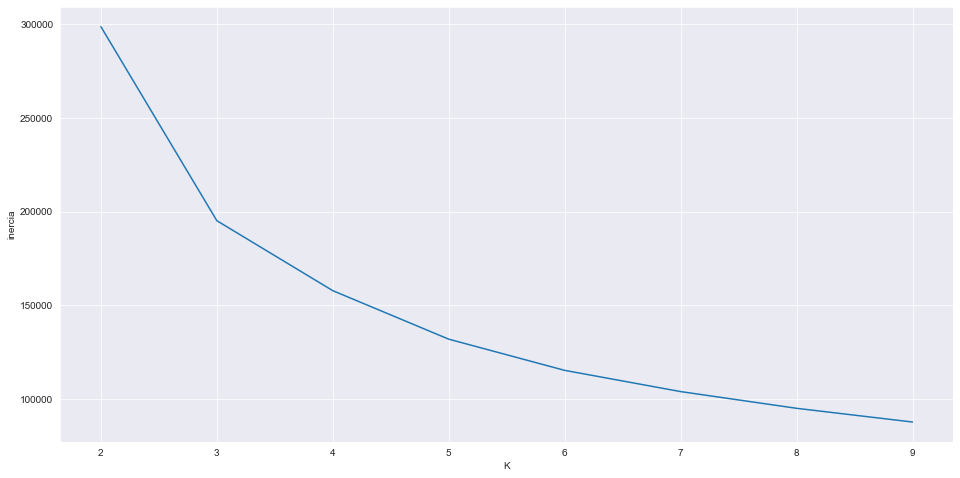

In [36]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data = eva[:10], x = "K", y = "inercia")

In [51]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [52]:
kmeans.fit(X_norm)

KMeans(n_clusters=3, random_state=0)

In [53]:
kmeans.cluster_centers_

array([[ 0.79146978, -1.43821243,  0.79146978, -0.37476947],
       [ 0.19643224,  0.6242002 ,  0.19643224, -0.12396374],
       [-1.8747175 , -0.02738203, -1.8747175 ,  0.99602728]])

In [55]:
workdf["CLUSTER"] = kmeans.labels_

In [56]:
workdf.head()


,AIRLINECODE,TotalVuelos,Cancelados,TotalDistancia,MediaDistancia,TotalArrDelay,MediaArrDelay,TotalDepDelay,MediaDepDelay,PorcentajeCancelado,CLUSTER
0,AA,21830,1041,20344881,931.968896,-2062.085024,-0.094461,76733.164731,3.515033,4.768667,0
1,AS,4565,265,3452548,756.308434,19505.366065,4.272807,22051.078438,4.830466,5.805038,1
2,CO,10477,404,10130693,966.945977,-5291.150009,-0.505025,16452.168637,1.570313,3.856066,0
3,DL,24309,1154,18009159,740.843268,47632.849617,1.959474,89095.051008,3.665106,4.747213,1
4,HP,6141,217,5435630,885.137600,19541.199638,3.182088,32428.701966,5.280688,3.533626,1


In [57]:
# "TRANSACTIONID", "ORIGINAIRPORTCODE", "ORIGINSTATE", "DESTAIRPORTCODE", "DESTSTATE"
columns = ["AIRLINECODE", "MediaDistancia", "MediaArrDelay", "MediaDepDelay", "PorcentajeCancelado", "CLUSTER"]
kdf = workdf.loc[:, columns]
kdf.head()

,AIRLINECODE,MediaDistancia,MediaArrDelay,MediaDepDelay,PorcentajeCancelado,CLUSTER
0,AA,931.968896,-0.094461,3.515033,4.768667,0
1,AS,756.308434,4.272807,4.830466,5.805038,1
2,CO,966.945977,-0.505025,1.570313,3.856066,0
3,DL,740.843268,1.959474,3.665106,4.747213,1
4,HP,885.137600,3.182088,5.280688,3.533626,1


In [59]:
kdf.loc[kdf["CLUSTER"] == 2]

,AIRLINECODE,MediaDistancia,MediaArrDelay,MediaDepDelay,PorcentajeCancelado,CLUSTER
5,KH,202.794349,1.142527,0.620439,4.395604,2
6,MQ,279.355670,2.034450,4.580202,8.111574,2


In [61]:
kdf.groupby("CLUSTER").agg({"MediaDistancia": np.mean, "MediaArrDelay": np.mean, "MediaDepDelay": np.mean, "PorcentajeCancelado": np.mean})

,MediaDistancia,MediaArrDelay,MediaDepDelay,PorcentajeCancelado
CLUSTER,,,,
0,866.692779,-0.519188,2.301928,4.205639
1,727.067907,2.561904,4.531184,4.580339
2,241.075009,1.588489,2.600321,6.253589


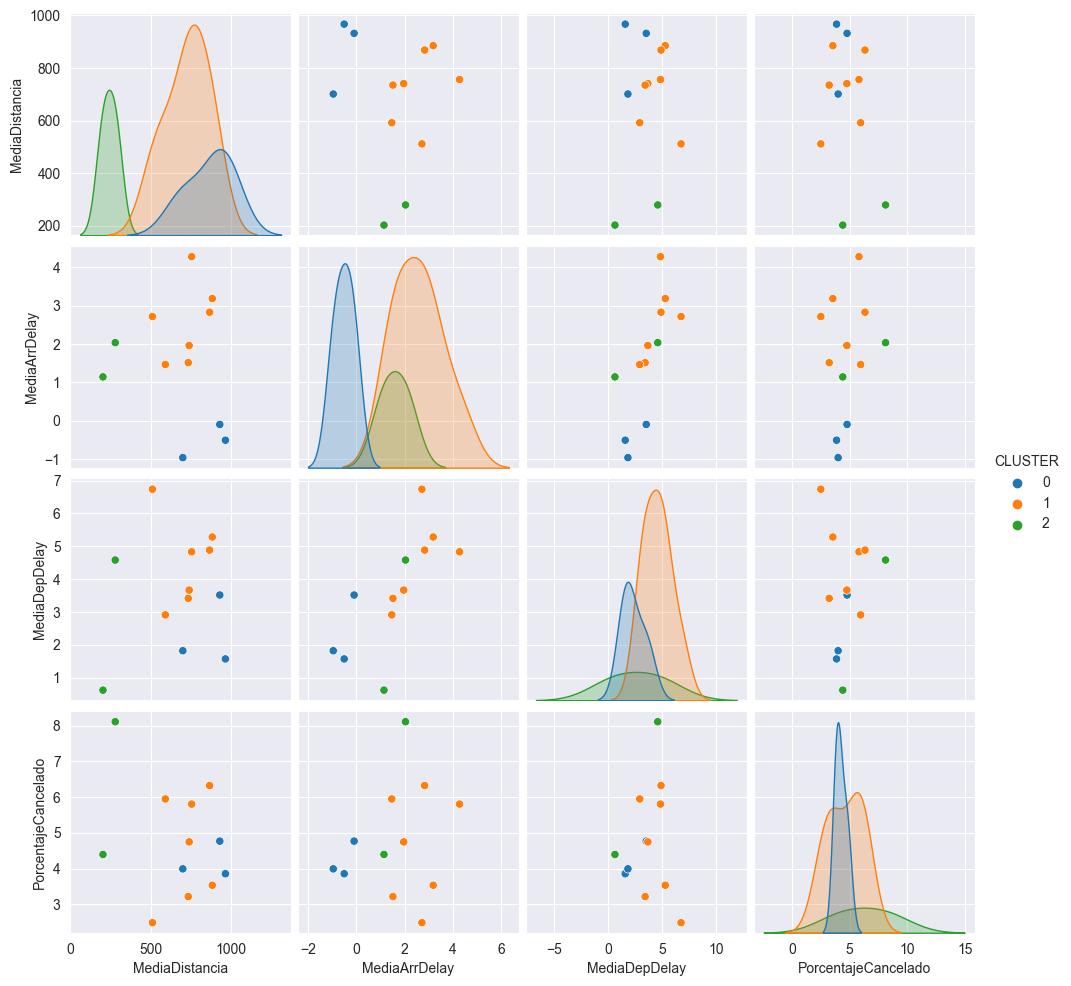

In [66]:
sns.set_style("darkgrid")
sns.pairplot(kdf, hue="CLUSTER", palette="tab10")

In [67]:
#El grupo 0 es el que posee bajos tiempos de retraso con una larga distancia, es decir en este grupo encontraríamos
#aereolineas que se enfocan en destinos lejanos con la mayor agilidad posible.

#El grupo 1 posee altos tiempos de delay con vuelos de distancia moderadamente larga además de tener un 4% de vuelos 
# cancelados, es decir aquí encontramos las aereolineas que realizan vuelos con altos tiempos de delay promedio y 
# de distancia considerable.

#El grupo 2 viajan distancias mínimas con un porcentaje de cancelacion del 6%, además posee tiempos de espera medios
#Este grupo de aereolineas se especializaría unicamente en vuelos de corta distancia.

<AxesSubplot:xlabel='CLUSTER', ylabel='MediaDistancia'>

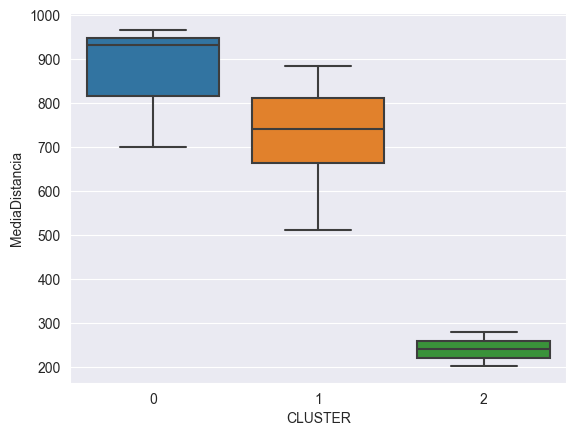

In [68]:
sns.boxplot(x="CLUSTER", y="MediaDistancia", data=kdf)

<AxesSubplot:xlabel='CLUSTER', ylabel='MediaArrDelay'>

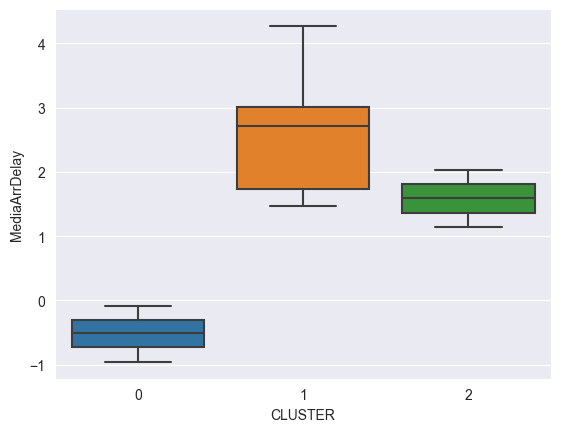

In [69]:
sns.boxplot(x="CLUSTER", y="MediaArrDelay", data=kdf)

<AxesSubplot:xlabel='CLUSTER', ylabel='MediaDepDelay'>

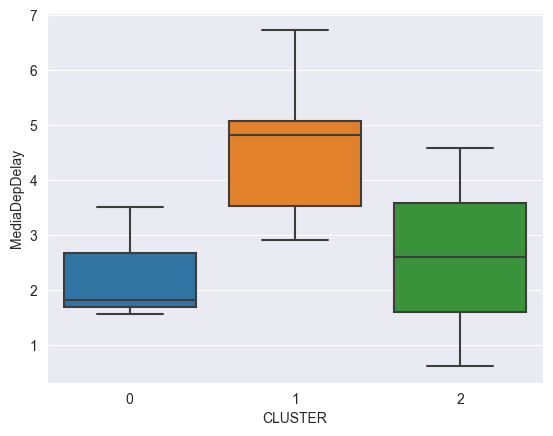

In [70]:
sns.boxplot(x="CLUSTER", y="MediaDepDelay", data=kdf)

<AxesSubplot:xlabel='CLUSTER', ylabel='PorcentajeCancelado'>

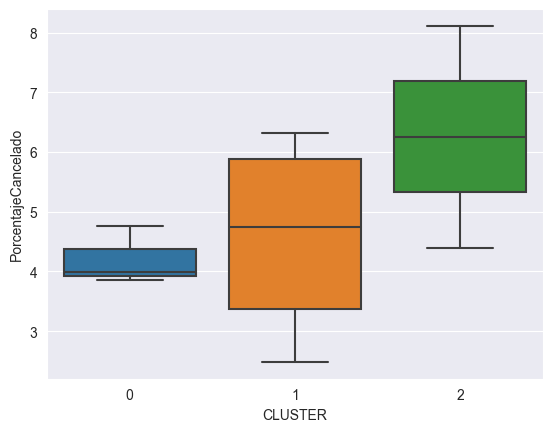

In [71]:
sns.boxplot(x="CLUSTER", y="PorcentajeCancelado", data=kdf)